In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import wave

### Audio

In [51]:
# wf = wave.open('Closed-Hi-Hat-2.wav', 'rb')
wf = wave.open('horse.wav', 'rb')
wave_data = wf.readframes(wf.getnframes())

audio_as_np_int16 = np.frombuffer(wave_data, dtype=np.int16)
audio_as_np_float32 = audio_as_np_int16.astype(np.float32)

# Normalise float32 array so that values are between -1.0 and +1.0
max_int16 = 2**15
audio_normalised = audio_as_np_float32 / max_int16
channels = wf.getnchannels()
audio_stereo = np.empty((int(len(audio_normalised)/channels), channels), dtype=np.float32)
audio_stereo[:,0] = audio_normalised[range(0,len(audio_normalised),2)]
audio_stereo[:,1] = audio_normalised[range(1,len(audio_normalised),2)]

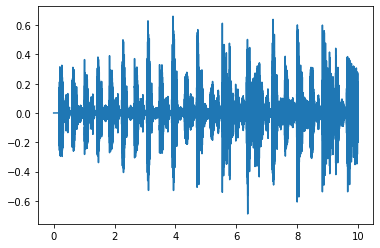

In [52]:
start = 0  # seconds
stop = 10  # seconds
framerate = wf.getframerate()
nframes = wf.getnframes()

to_plot = audio_stereo[:stop * framerate, 0]
plt.plot(np.linspace(0, len(to_plot) / framerate, len(to_plot)), to_plot)

In [53]:
from pyaudio import PyAudio, paContinue
p = PyAudio()
stream = p.open(
    format=p.get_format_from_width(4),
    channels=1,
    rate=48000,
    output=True,
)
stream.start_stream()
# stream.write(audio_normalised[range(0,len(audio_normalised),2)][:100000].tobytes())
stream.write(audio_stereo[:100000, 0].tobytes())
stream.close()
p.terminate()


ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_oss.c:377:(_snd_pcm_oss_open) Unknown field port
ALSA lib pcm_oss.c:377:(_snd_pcm_oss_open) Unknown field port
ALSA lib pcm_usb_stream.c:486:(_snd_pcm_usb_stream_open) Invalid type for card
ALSA lib pcm_usb_stream.c:486:(_snd_pcm_usb_stream_open) Invalid type for card


In [7]:
stream.close()


### Stim

In [79]:
sample_rate = 20   

FREQUENCY = 0.6 #Hz
LENGTH = 166 #seconds

NUMBEROFFRAMES = int(sample_rate * LENGTH)

stim_track = np.sin(np.linspace(0, 1, NUMBEROFFRAMES, dtype=np.float32) * FREQUENCY * LENGTH * (2 * math.pi)) * 0.5 + 0.5
stim_to_plot = stim_track[:10*sample_rate]
# plt.plot(np.linspace(0, len(stim_track) / sample_rate, len(stim_track)), stim_track)

### Alignment

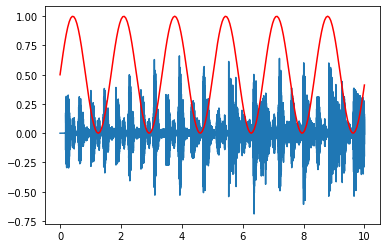

In [80]:
plt.plot(np.linspace(0, len(to_plot) / framerate, len(to_plot)), to_plot)
plt.plot(np.linspace(0, len(stim_to_plot) / sample_rate, len(stim_to_plot)), stim_to_plot, c="Red")

In [81]:
np.save('horse.npy', audio_stereo[:,0])
np.save('horse-stim.npy', stim_track)

In [57]:
bob = np.load('horse-stim.npy')